In [19]:
import pandas as pd

In [53]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn import linear_model #linear model from sklearn
from sklearn.metrics import r2_score # evaluation
import seaborn as sns # plotting
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#  Load data csv file

In [21]:
# load data csv file
path = '13100762.csv'
df = pd.read_csv(path)
df

,REF_DATE,GEO,DGUID,Sex,Primary types of cancer (ICD-O-3),Stage at diagnosis,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2010,Canada excluding Quebec,NaN,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",All stages combined (Collaborative Stage),Total number of cancer cases,Number,223,units,0,v1139465853,15.1.1.1.1,16165.0,NaN,NaN,NaN,0
1,2010,Canada excluding Quebec,NaN,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",All stages combined (Collaborative Stage),Cancer incidence rate,"Rate per 100,000 population",265,units,0,v1139465854,15.1.1.1.2,64.2,NaN,NaN,NaN,1
2,2010,Canada excluding Quebec,NaN,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",All stages combined (Collaborative Stage),"Low 95% confidence interval, cancer incidence ...","Rate per 100,000 population",265,units,0,v1139465855,15.1.1.1.3,63.2,NaN,NaN,NaN,1
3,2010,Canada excluding Quebec,NaN,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",All stages combined (Collaborative Stage),"High 95% confidence interval, cancer incidence...","Rate per 100,000 population",265,units,0,v1139465856,15.1.1.1.4,65.1,NaN,NaN,NaN,1
4,2010,Canada excluding Quebec,NaN,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",Stage 0 (Collaborative Stage),Total number of cancer cases,Number,223,units,0,v1139465857,15.1.1.2.1,135.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59899,2017,Nunavut,2016A000262,Females,Cervix uteri [C53.0-C53.9],Stage unknown (Collaborative Stage),"High 95% confidence interval, cancer incidence...","Rate per 100,000 population",265,units,0,v1139465760,14.3.6.7.4,NaN,x,NaN,NaN,1
59900,2017,Nunavut,2016A000262,Females,Cervix uteri [C53.0-C53.9],Stage not available (Collaborative Stage),Total number of cancer cases,Number,223,units,0,v1139465761,14.3.6.8.1,NaN,x,NaN,NaN,0
59901,2017,Nunavut,2016A000262,Females,Cervix uteri [C53.0-C53.9],Stage not available (Collaborative Stage),Cancer incidence rate,"Rate per 100,000 population",265,units,0,v1139465762,14.3.6.8.2,NaN,x,NaN,NaN,1
59902,2017,Nunavut,2016A000262,Females,Cervix uteri [C53.0-C53.9],Stage not available (Collaborative Stage),"Low 95% confidence interval, cancer incidence ...","Rate per 100,000 population",265,units,0,v1139465763,14.3.6.8.3,NaN,x,NaN,NaN,1


# Drop unnecessary columns 

In [22]:
#Drop unnecessary columns 
df = df.drop(columns=['DGUID', 'Stage at diagnosis', 'Characteristics','UOM','UOM_ID','SCALAR_FACTOR','SCALAR_ID','VECTOR','COORDINATE','STATUS','SYMBOL','TERMINATED','DECIMALS'])


In [23]:
df

,REF_DATE,GEO,Sex,Primary types of cancer (ICD-O-3),VALUE
0,2010,Canada excluding Quebec,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",16165.0
1,2010,Canada excluding Quebec,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",64.2
2,2010,Canada excluding Quebec,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",63.2
3,2010,Canada excluding Quebec,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",65.1
4,2010,Canada excluding Quebec,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",135.0
...,...,...,...,...,...
59899,2017,Nunavut,Females,Cervix uteri [C53.0-C53.9],NaN
59900,2017,Nunavut,Females,Cervix uteri [C53.0-C53.9],NaN
59901,2017,Nunavut,Females,Cervix uteri [C53.0-C53.9],NaN
59902,2017,Nunavut,Females,Cervix uteri [C53.0-C53.9],NaN


In [26]:
df.columns = ['Year', 'Province','Sex', 'Types of cancer','Number of patients']
df

,Year,Province,Sex,Types of cancer,Number of patients
0,2010,Canada excluding Quebec,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",16165.0
1,2010,Canada excluding Quebec,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",64.2
2,2010,Canada excluding Quebec,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",63.2
3,2010,Canada excluding Quebec,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",65.1
4,2010,Canada excluding Quebec,Both sexes,"Colon and rectum [C18.0-C18.9, C19.9, C20.9, C...",135.0
...,...,...,...,...,...
59899,2017,Nunavut,Females,Cervix uteri [C53.0-C53.9],NaN
59900,2017,Nunavut,Females,Cervix uteri [C53.0-C53.9],NaN
59901,2017,Nunavut,Females,Cervix uteri [C53.0-C53.9],NaN
59902,2017,Nunavut,Females,Cervix uteri [C53.0-C53.9],NaN


# Clean type of cancer

In [27]:
# clean type of cancer values
df['Types of cancer'] = df['Types of cancer'].str.replace(r'\[.*?\]', '', regex=True).str.strip()
df

,Year,Province,Sex,Types of cancer,Number of patients
0,2010,Canada excluding Quebec,Both sexes,Colon and rectum,16165.0
1,2010,Canada excluding Quebec,Both sexes,Colon and rectum,64.2
2,2010,Canada excluding Quebec,Both sexes,Colon and rectum,63.2
3,2010,Canada excluding Quebec,Both sexes,Colon and rectum,65.1
4,2010,Canada excluding Quebec,Both sexes,Colon and rectum,135.0
...,...,...,...,...,...
59899,2017,Nunavut,Females,Cervix uteri,NaN
59900,2017,Nunavut,Females,Cervix uteri,NaN
59901,2017,Nunavut,Females,Cervix uteri,NaN
59902,2017,Nunavut,Females,Cervix uteri,NaN


In [28]:
# check missing values
df.isnull().sum()

Year                      0
Province                  0
Sex                       0
Types of cancer           0
Number of patients    17696
dtype: int64

#  Drop Missing Values Number of Patients

In [29]:
df.dropna(subset=['Number of patients'], inplace=True)


In [30]:
df.isnull().sum()

Year                  0
Province              0
Sex                   0
Types of cancer       0
Number of patients    0
dtype: int64

In [31]:
#information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42208 entries, 0 to 59871
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                42208 non-null  int64  
 1   Province            42208 non-null  object 
 2   Sex                 42208 non-null  object 
 3   Types of cancer     42208 non-null  object 
 4   Number of patients  42208 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


In [32]:
df.describe()

,Year,Number of patients
count,42208.000000,42208.000000
mean,2013.509951,151.893710
std,2.294600,868.428355
min,2010.000000,0.000000
25%,2012.000000,4.800000
50%,2014.000000,12.400000
75%,2016.000000,49.425000
max,2017.000000,19730.000000


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Number of patients'}>]],
      dtype=object)

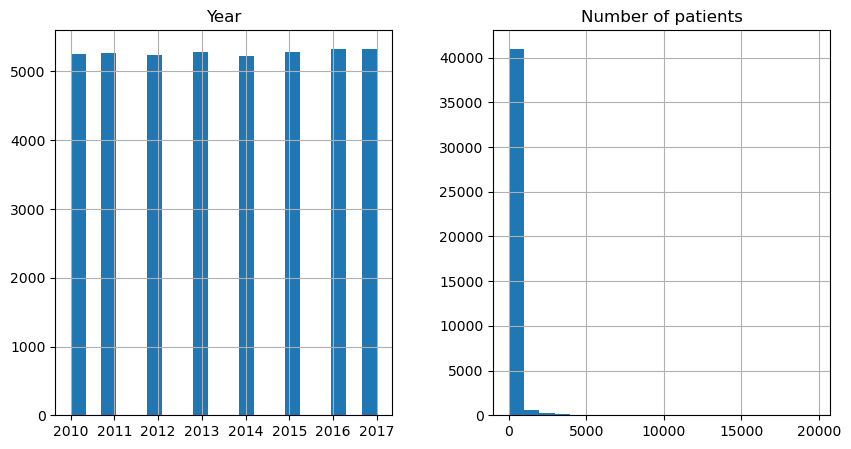

In [37]:
df.hist(bins=20, figsize=(10,5)) 


# Convert textual categories to integers

In [91]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in ['Province', 'Sex', 'Types of cancer']:
    l = LabelEncoder()
    df[column] = l.fit_transform(df[column])
    label_encoders[column] = l

In [40]:
df

,Year,Province,Sex,Types of cancer,Number of patients
0,2010,2,0,2,16165.0
1,2010,2,0,2,64.2
2,2010,2,0,2,63.2
3,2010,2,0,2,65.1
4,2010,2,0,2,135.0
...,...,...,...,...,...
59855,2017,8,1,0,340.1
59868,2017,8,1,0,5.0
59869,2017,8,1,0,25.0
59870,2017,8,1,0,4.2


# Train Test Split

In [46]:
X = df[['Year', 'Province', 'Sex', 'Types of cancer']]
Y = df['Number of patients']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# linear Regression

In [92]:
## Create the linear regression object and fit the model
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

# Predictions

In [93]:
pred=lm.predict(X_test)

# Evaluate by mse

In [94]:
mse = mean_squared_error(y_test, pred)
mse

655442.4707335171

# Evaluate by rmse

In [95]:
pred=lm.predict(X_test)
lm_mse = mean_squared_error(y_test, pred)
lm_rmse = np.sqrt(lm_mse)
lm_rmse

809.5940159941383

# Visualize Scatter Plot

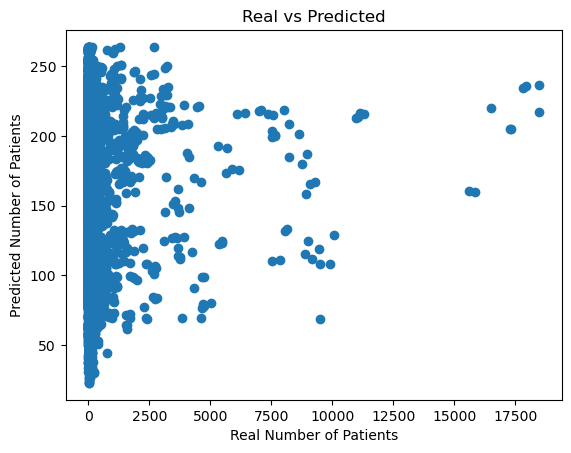

In [96]:
plt.scatter(y_test, pred)
plt.xlabel('Real Number of Patients')
plt.ylabel('Predicted Number of Patients')
plt.title('Real vs Predicted')
plt.show()

# DecisionTreeRegressor


In [97]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X,Y)

DecisionTreeRegressor()

#  Evaluate by rmse

In [98]:
pred=tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


779.2593250150132

# Evaluate by mse

In [99]:
mse = mean_squared_error(y_test, pred)
mse

607245.0956228541

# Visualize Scatter Plot

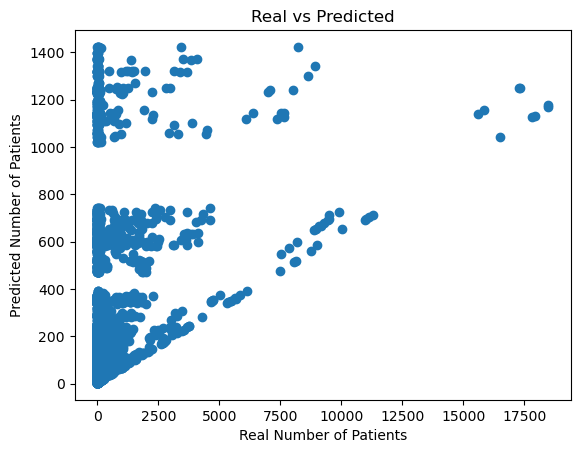

In [100]:
plt.scatter(y_test, pred)
plt.xlabel('Real Number of Patients')
plt.ylabel('Predicted Number of Patients')
plt.title('Real vs Predicted')
plt.show()

# RandomForestRegressor

In [101]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X,Y)

RandomForestRegressor()

# Evaluate random forest by rmse

In [102]:
## evaluate random forest by rmse
pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

779.492326709332

# Evaluate random forest by mse

In [103]:
mse = mean_squared_error(y_test, pred)
mse

607608.2873987281

# Visualize Scatter Plot

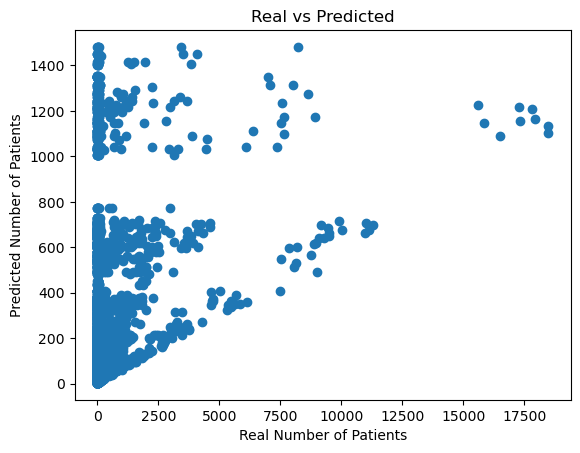

In [104]:
plt.scatter(y_test, pred)
plt.xlabel('Real Number of Patients')
plt.ylabel('Predicted Number of Patients')
plt.title('Real vs Predicted')
plt.show()

# Report


Data source:Operating under the Statistics Act, the Canadian Cancer Registry (CCR) acts as a vast administrative data warehouse. Provincial/territorial Cancer Registries (PTCRs) provide Statistics Canada with information on cancer patients and tumours each year. The CCR, which is dynamic, experiences an influx of primary tumour records every year along with updates to previously reported data. https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310076201

 Question:How can we forecast the number of patients for a specific region, gender, and cancer type in the upcoming years?

The use of machine learning for predictive modelling is one area where technology promises to be extremely valuable as the healthcare sector continues to develop. With the use of several variables like the year, province, gender, and cancer kind, our most recent project sought to forecast the number of cancer patients. This report details our progression from manipulating raw data to evaluating models and the learnings.

Understanding and preprocessing the data are the first steps in every data science effort. Our dataset, which was derived from a CSV file, had superfluous columns that were later trimmed for effectiveness and clarity. For easier comprehension, the columns were then appropriately renamed to Year, Province, Sex, Types of cancer, and Number of patients. The Types of cancer column also underwent a cleaning procedure to remove any extraneous content, assuring the consistency and dependability of the data. Missing values in datasets may give falsely inflated findings. The same was true for our dataset. Gaps were found after a thorough inspection, particularly in the crucial Number of patients column. These anomalies were immediately fixed in order to preserve data integrity. After the dataset had been cleaned, we turned our focus to encoding. With numerical data, machine learning models perform at their best. As a result, our dataset's textual categories were automatically converted into integer representations, opening the door for modelling. The Linear Regression, Decision Tree Regressor, and Random Forest Regressor machine learning models were tested. The training dataset was used to train each model, and the test set was used to confirm its validity. An essential component of predictive modelling, the linear regression model, produced an RMSE and MSE of 809.5 and 655442.4, respectively. With an RMSE of 779.2 and an MSE of 607245.0, the Decision Tree Regressor, which builds a tree-like representation of decisions, outperformed the Linear Regression model. Last but not least, the ensemble learning technique known as the Random Forest Regressor, which had an RMSE of 779.4 and an MSE of 607608.28, generated outcomes comparable to those of the Decision Tree. The Decision Tree Regressor displayed superior performance with the lowest RMSE (779.2) and MSE (607245.0) values among the three models - Linear Regression, Decision Tree Regressor, and Random Forest Regressor - based on the examined metrics. As a result, the Decision Tree Regressor is found to be the best model for this particular dataset. Additionally, scatter plots were produced as visual representations, which clearly show how well the models performed by contrasting real and anticipated values.



The Decision Tree Regressor, in the end, proved to be the most accurate model for our dataset. Even if each model has advantages and disadvantages, the Decision Tree's higher performance highlights how flexible and reliable it is for this particular use case. The effectiveness of machine learning in healthcare analytics is highlighted by this investigation. Healthcare personnel may more accurately predict patient intake, optimize resource allocation, and potentially even improve patient outcomes with a strong model in hand.

